In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [3]:
shp_cons = gpd.read_file('Raw Air Pollution Data/json_shapefile.shp')

In [4]:
pm10_2019 = pd.read_csv('Structured Data/avg_pm10_2019.csv')
pm10_2017 = pd.read_csv('Structured Data/avg_pm10_2017.csv')
pm10_2015 = pd.read_csv('Structured Data/avg_pm10_2015.csv')
pm10_2010 = pd.read_csv('Structured Data/avg_pm10_2010.csv')

green2019 = pd.read_csv('Maps/green2019.csv')
green2017 = pd.read_csv('Maps/green2017.csv')
green2015 = pd.read_csv('Maps/green2015.csv')
green2010 = pd.read_csv('Maps/green2010.csv')



In [5]:
merged_df_pollution = pd.concat([pm10_2019, pm10_2017, pm10_2015, pm10_2010])
pm10_averages = merged_df_pollution.groupby('pcn20cd')['avg_value'].mean().reset_index()


In [6]:
merged_df_vote = pd.concat([green2019, green2017, green2015, green2010])
vote_averages = merged_df_vote.groupby('id')['voteShare'].mean().reset_index()
vote_averages = vote_averages.rename(columns={'id': 'pcn20cd'})


<AxesSubplot: >

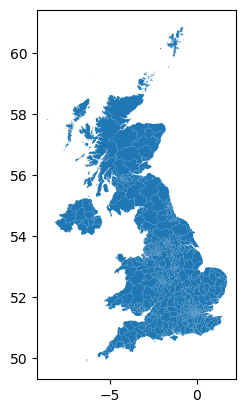

In [4]:
shp_cons.plot()


<AxesSubplot: >

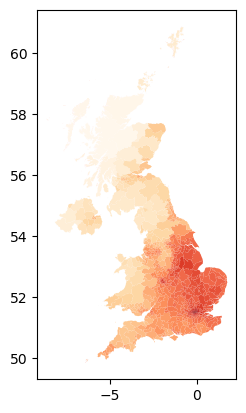

In [13]:
pollution_map_pm10_avg = shp_cons.merge(pm10_averages, on='pcn20cd')

# Plot the joined data with the variable of interest as the fill color
pollution_map_pm10_avg.plot(column='avg_value', cmap='OrRd')


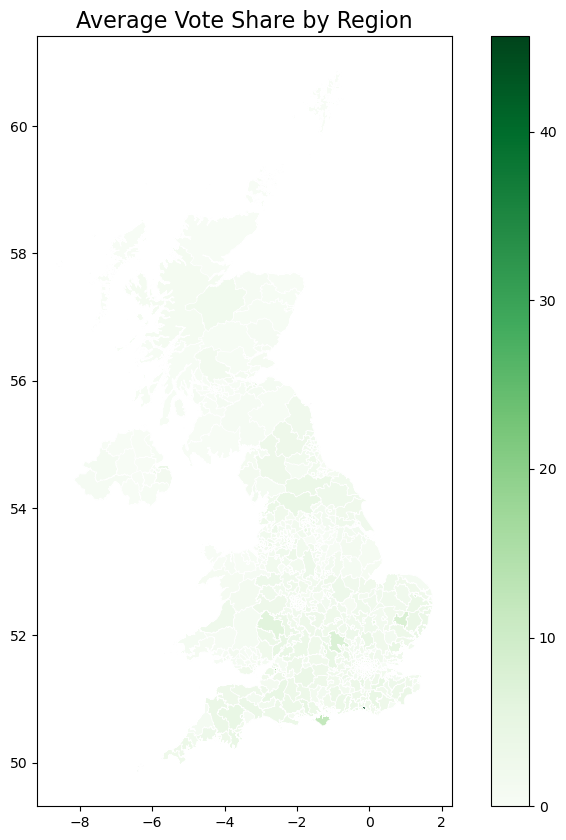

In [14]:
votes_avg_map = shp_cons.merge(vote_averages, on='pcn20cd')


# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
votes_avg_map.plot(column='voteShare', cmap="Greens", ax=ax, linewidth=0.5, edgecolor='white')

# Add a title and legend
ax.set_title('Average Vote Share by Region', fontsize=16)
vmin, vmax = votes_avg_map['voteShare'].min(), votes_avg_map['voteShare'].max()
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, ax=ax)

# Show the plot
plt.show()

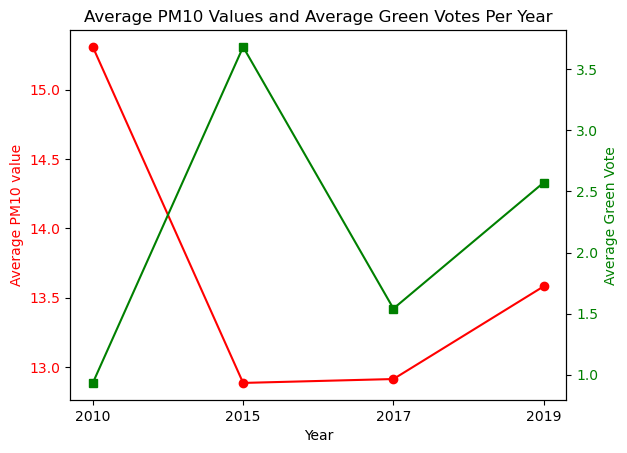

In [29]:


# Create the figure and axes objects
fig, ax1 = plt.subplots()

# Add a second y-axis to the plot
ax2 = ax1.twinx()

# Plot the first data series
ax1.plot(df['Year'], df['Average PM 10'], marker='o', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM10 value', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Plot the second data series
ax2.plot(df['Year'], df['Average Green Vote'], marker='s', color='green')
ax2.set_ylabel('Average Green Vote', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title
plt.title('Average PM10 Values and Average Green Votes Per Year')

# Show the plot
plt.show()
